# Helium effect

Here we are going to study if computing our grid with the formula for Y or doing it with the same Y abundances as Baraffe uses arises important changes.

We will do it for a fixed value of the metallicity for comparing with BF15 and for a fixed value of alpha for comparing with BF98.

In [1]:
import mesa_reader as mr
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D  
%matplotlib ipympl

## $\alpha_\text{MLT}$ effect - BF15

In [2]:
df = pd.read_csv('Baraffe2015-tracks-clean.txt', delim_whitespace=True, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.01,5.695210,2388.0,-2.469,3.372,0.341,0.0000,5.417,0.2639,0.0000,0.000,0.45350,0.0000
1,0.01,5.702261,2387.0,-2.474,3.377,0.339,0.0000,5.418,0.2696,0.0000,0.000,0.45380,0.0000
2,0.01,5.709309,2387.0,-2.479,3.381,0.337,0.0000,5.420,0.2753,0.0000,0.000,0.45420,0.0000
3,0.01,5.723397,2386.0,-2.488,3.391,0.334,0.0000,5.423,0.2867,0.0000,0.000,0.45500,0.0000
4,0.01,5.730433,2386.0,-2.493,3.395,0.332,0.0000,5.424,0.2925,0.0000,0.000,0.45530,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11716,1.40,9.425035,6207.0,0.729,3.980,2.004,-0.0278,7.395,2.3306,1.3995,1.733,0.01432,0.1894
11717,1.40,9.425153,6209.0,0.730,3.980,2.005,-0.0278,7.396,2.3325,1.3995,1.740,0.01386,0.1893
11718,1.40,9.425268,6211.0,0.731,3.979,2.005,-0.0278,7.396,2.3344,1.3995,1.739,0.01385,0.1891
11719,1.40,9.425381,6213.0,0.732,3.979,2.006,-0.0278,7.397,2.3372,1.3995,1.738,0.01384,0.1889


In [3]:
df.columns = ['mass', 'age', 'Teff', 'logL', 'logg', 'radius'] + ['other'] * (df.shape[1] - 6)

# Necessary columns
df_cleaned = df[['mass', 'age', 'Teff', 'logL', 'logg', 'radius']]
df_cleaned

,mass,age,Teff,logL,logg,radius
0,0.01,5.695210,2388.0,-2.469,3.372,0.341
1,0.01,5.702261,2387.0,-2.474,3.377,0.339
2,0.01,5.709309,2387.0,-2.479,3.381,0.337
3,0.01,5.723397,2386.0,-2.488,3.391,0.334
4,0.01,5.730433,2386.0,-2.493,3.395,0.332
...,...,...,...,...,...,...
11716,1.40,9.425035,6207.0,0.729,3.980,2.004
11717,1.40,9.425153,6209.0,0.730,3.980,2.005
11718,1.40,9.425268,6211.0,0.731,3.979,2.005
11719,1.40,9.425381,6213.0,0.732,3.979,2.006


In [4]:
# Dictionaries to store values according to mass
mass_data = {}

# Group them by mass
grouped = df_cleaned.groupby('mass')

for mass, group in grouped:
    mass_data[mass] = {
        'ages': group['age'].tolist(),
        'Teff': group['Teff'].tolist(),
        'logL': group['logL'].tolist(),
        'logg': group['logg'].tolist(),
        'radius': group['radius'].tolist()
    }

# Now mass_data has the values grouped by mass

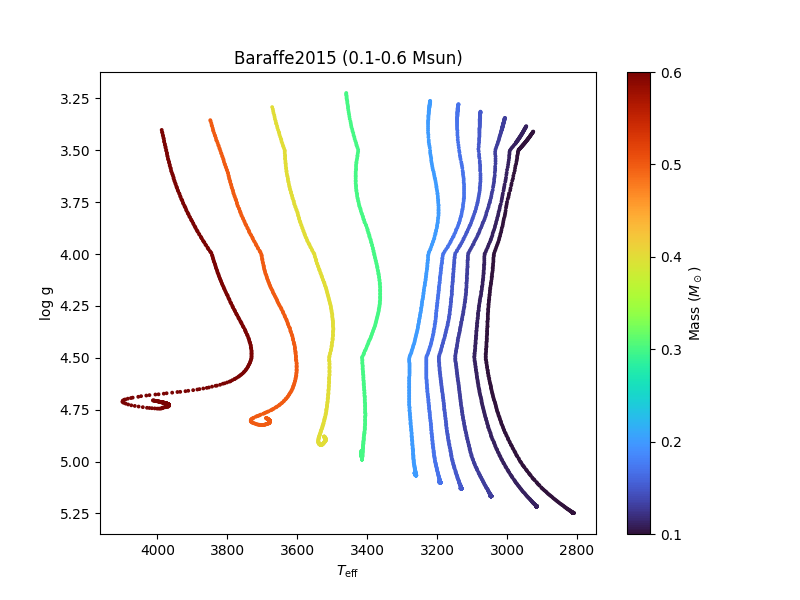

In [5]:
# Filter masses between 0.1 and 0.6 solar masses
filtered_df = df_cleaned[(df_cleaned['mass'] >= 0.1) & (df_cleaned['mass'] <= 0.6)]

fig, ax = plt.subplots(figsize=(8, 6))  # Cambia los valores para ajustar el tamaño (ancho, alto)

# Colours list based on mass values
norm = plt.Normalize(filtered_df['mass'].min(), filtered_df['mass'].max())
cmap = plt.cm.turbo

# logg vs Teff
sc = ax.scatter(filtered_df['Teff'], filtered_df['logg'], c=filtered_df['mass'], cmap=cmap, norm=norm, alpha=1, s=3)

ax.invert_xaxis()
ax.invert_yaxis()

# Colour bar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label(r'Mass ($M_\odot$)')

ax.set_xlabel(r'$T_\text{eff}$')
ax.set_ylabel('log g')
ax.set_title('Baraffe2015 (0.1-0.6 Msun)')

plt.show()


In [6]:
# 0.10, 0.30, 0.40 and 0.60 Msun tracks
# we will plot them with our models

mass_010_BF15 = filtered_df[filtered_df['mass'] == 0.10]
mass_030_BF15 = filtered_df[filtered_df['mass'] == 0.30]
mass_040_BF15 = filtered_df[filtered_df['mass'] == 0.40]
mass_060_BF15 = filtered_df[filtered_df['mass'] == 0.60]

### my grid using the formula

Fixed \[Fe/H\] = 0 because we are going to compare with BF15.
We are going to plot only 0.1 and 0.6 masses so it's not that overcrowded

In [7]:
# Define the parameters
masses = [0.1, 0.6]
alphas = [1.0, 1.6, 1.82]
metallicities = [0.0142]


# Base path
base_path = 'test2_grid_deuterium_tau100/results/mass{mass}_alpha{alpha}_z{z}/history.data'

# Create a list to store the MesaData instances and their associated alpha values
mesa_data_list = []

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance to the list
                mesa_data_list.append((mesa_data_instance, mass, z, alpha))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")


In [8]:
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        Yformula_mass010_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.6:
        Yformula_mass010_z0142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        Yformula_mass010_z0142_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        Yformula_mass060_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.6:
        Yformula_mass060_z0142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        Yformula_mass060_z0142_alpha1 = mesa_data[0]
        break

### my grid using fixed Y = 0.28

Fixed $\alpha$ = 1.6 because we are going to compare with BF15
We are going to plot only 0.1 and 0.6 so it's not that overcrowded

In [9]:
# Define the parameters
masses = [0.1, 0.6]
alphas = [1.0, 1.6, 1.82]
metallicities = [0.0142]


# Base path
base_path = 'test_grid_baraffe15_he_abundance/results/mass{mass}_alpha{alpha}_z{z}/history.data'

# Create a list to store the MesaData instances and their associated alpha values
mesa_data_list = []

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance to the list
                mesa_data_list.append((mesa_data_instance, mass, z, alpha))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")


In [10]:
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        fixedY_mass010_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.6:
        fixedY_mass010_z0142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        fixedY_mass010_z0142_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        fixedY_mass060_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.6:
        fixedY_mass060_z0142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        fixedY_mass060_z0142_alpha1 = mesa_data[0]
        break

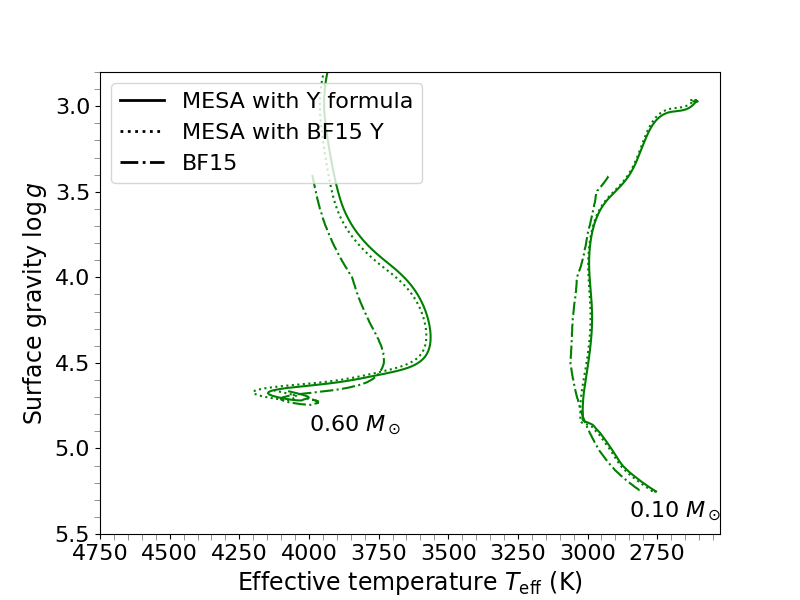

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

# Annotations
plt.annotate(r'0.10 $M_\odot$', (2850, 5.4), fontsize=16)
plt.annotate(r'0.60 $M_\odot$', (4000, 4.9), fontsize=16)


plt.plot(Yformula_mass010_z0142_alpha16.Teff, Yformula_mass010_z0142_alpha16.log_g, color='green', linestyle='-')

plt.plot(fixedY_mass010_z0142_alpha16.Teff, fixedY_mass010_z0142_alpha16.log_g, color='green', linestyle=':')

plt.plot(mass_010_BF15['Teff'], mass_010_BF15['logg'], color='green', ls='-.', label='BF15')

plt.plot(Yformula_mass060_z0142_alpha16.Teff, Yformula_mass060_z0142_alpha16.log_g, color='green', linestyle='-')

plt.plot(fixedY_mass060_z0142_alpha16.Teff, fixedY_mass060_z0142_alpha16.log_g, color='green', linestyle=':')

plt.plot(mass_060_BF15['Teff'], mass_060_BF15['logg'], color='green', ls='-.')

# Set axis labels
plt.xlabel(r'Effective temperature $T_{\text{eff}}$ (K)', fontsize=17)
plt.ylabel(r'Surface gravity $\log g$', fontsize=17)

# plt.title(r'$\alpha$ = 1.6; [Fe/H] = 0', fontsize=16)

# Retrieve current axis
ax = plt.gca()

# Set major and minor ticks
xmajor_ticks = np.arange(4750, 2500, -250)
xminor_ticks = np.arange(4750, 2500, -50)
ymajor_ticks = np.arange(5.5, 2, -0.5)
yminor_ticks = np.arange(5.5, 2, -0.1)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

# Customize tick appearance
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', length=4, color='gray')

# Invert axes
ax.invert_xaxis()
ax.invert_yaxis()

plt.ylim(5.5,2.8)

# Enable grid for minor ticks
#ax.grid(which='both', linestyle='--', linewidth=0.5)
#ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

# Create a custom legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, linestyle='-', label=r'MESA with Y formula'),
    Line2D([0], [0], color='black', lw=2, linestyle=':', label=r'MESA with BF15 Y'),
    Line2D([0], [0], color='black', lw=2, linestyle='-.', label=r'BF15'),
]
plt.legend(handles=legend_elements, fontsize=16, loc='upper left')

# Save figure
plt.savefig('He-comparison-BF15.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


## Metallicity effect - BF98

In [12]:
# read data with pandas

df_feh_m05 = pd.read_csv('BCAH98/BCAH98_models_feh_m0.5.txt', delim_whitespace=True, header=None, skiprows=19)
df_feh_p00_alpha_1 = pd.read_csv('BCAH98/BCAH98_models_feh_p0.0_alpha_1.0.txt', delim_whitespace=True, header=None, skiprows=28)
df_feh_p00_alpha_15 = pd.read_csv('BCAH98/BCAH98_models_feh_p0.0_alpha_1.5.txt', delim_whitespace=True, header=None, skiprows=28)
df_feh_p00_alpha_19 = pd.read_csv('BCAH98/BCAH98_models_feh_p0.0_alpha_1.9.txt', delim_whitespace=True, header=None, skiprows=29)

In [13]:
# we will store only the necessary columns

# [Fe/H] = -0.5,  alpha = 1
df_feh_m05.columns = ['mass', 'age', 'Teff', 'logg'] + ['other'] * (df_feh_m05.shape[1] - 4)
df_feh_m05_cleaned = df_feh_m05[['mass', 'age', 'Teff', 'logg']]

# [Fe/H] = 0, alpha = 1
df_feh_p00_alpha_1.columns = ['mass', 'age', 'Teff', 'logg'] + ['other'] * (df_feh_p00_alpha_1.shape[1] - 4)
df_feh_p00_alpha_1_cleaned = df_feh_p00_alpha_1[['mass', 'age', 'Teff', 'logg']]

# [Fe/H] = 0, alpha = 1.5
df_feh_p00_alpha_15.columns = ['mass', 'age', 'Teff', 'logg'] + ['other'] * (df_feh_p00_alpha_1.shape[1] - 4)
df_feh_p00_alpha_15_cleaned = df_feh_p00_alpha_15[['mass', 'age', 'Teff', 'logg']]

# [Fe/H] = 0, alpha = 1.9                     
df_feh_p00_alpha_19.columns = ['mass', 'age', 'Teff', 'logg'] + ['other'] * (df_feh_p00_alpha_19.shape[1] - 4)
df_feh_p00_alpha_19_cleaned = df_feh_p00_alpha_19[['mass', 'age', 'Teff', 'logg']]

In [14]:
# Filter 0.10, 0.35, and 0.60 Msun tracks

# [Fe/H] = -0.5,  alpha = 1

mass_010_feh_m05 = df_feh_m05_cleaned[df_feh_m05_cleaned['mass'] == 0.10]
mass_035_feh_m05 = df_feh_m05_cleaned[df_feh_m05_cleaned['mass'] == 0.35]
mass_060_feh_m05 = df_feh_m05_cleaned[df_feh_m05_cleaned['mass'] == 0.60]

# [Fe/H] = 0, alpha = 1

mass_010_feh_p00_alpha1 = df_feh_p00_alpha_1_cleaned[df_feh_p00_alpha_1_cleaned['mass'] == 0.10]
mass_035_feh_p00_alpha1 = df_feh_p00_alpha_1_cleaned[df_feh_p00_alpha_1_cleaned['mass'] == 0.35]
mass_060_feh_p00_alpha1 = df_feh_p00_alpha_1_cleaned[df_feh_p00_alpha_1_cleaned['mass'] == 0.60]

# [Fe/H] = 0, alpha = 1.5
# BF98 only have 0.60Msun models for alpha = 1.5

mass_060_feh_p00_alpha15 = df_feh_p00_alpha_15_cleaned[df_feh_p00_alpha_15_cleaned['mass'] == 0.60]

# [Fe/H] = 0, alpha = 1.9
# BF98 doesn't have 0.35Msun models, instead they have 0.30 and 0.40

mass_010_feh_p00_alpha19 = df_feh_p00_alpha_19_cleaned[df_feh_p00_alpha_19_cleaned['mass'] == 0.10]
mass_030_feh_p00_alpha19 = df_feh_p00_alpha_19_cleaned[df_feh_p00_alpha_19_cleaned['mass'] == 0.30]
mass_040_feh_p00_alpha19 = df_feh_p00_alpha_19_cleaned[df_feh_p00_alpha_19_cleaned['mass'] == 0.40]
mass_060_feh_p00_alpha19 = df_feh_p00_alpha_19_cleaned[df_feh_p00_alpha_19_cleaned['mass'] == 0.60]

## my grid using Y formula

We fix $\alpha$ = 1.0 because we are going to compare with BF98.
In order not to overcrowd the figures we only plot 0.10 and 0.60 masses and two metallicities

In [15]:
# Define the parameters
masses = [0.1, 0.6]
alphas = [1.0]
metallicities = [0.0028, 0.0142]


# Base path template
base_path = 'test2_grid_deuterium_tau100/results/mass{mass}_alpha{alpha}_z{z}/history.data'

# Create a list to store the MesaData instances and their associated alpha values
mesa_data_list = []

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance to the list
                mesa_data_list.append((mesa_data_instance, mass, z, alpha))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")


In [16]:
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0028 and mesa_data[3] == 1.0:   
        Yformula_mass010_z0028_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        Yformula_mass010_z0142_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0028 and mesa_data[3] == 1.0:  
        Yformula_mass060_z0028_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        Yformula_mass060_z0142_alpha1 = mesa_data[0]
        break
        
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0028 and mesa_data[3] == 1.0:  
        Yformula_mass060_z0028_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        Yformula_mass060_z0142_alpha1 = mesa_data[0]
        break


## my grid using Baraffe's Y

In [17]:
# Define the parameters
masses = [0.1, 0.6]
alphas = [1.0]
metallicities = [0.0028, 0.0142]


# Base path template
base_path = 'test_grid_BF98_full/results/mass{mass}_alpha{alpha}_z{z}/history.data'

# Create a list to store the MesaData instances and their associated alpha values
mesa_data_list = []

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance to the list
                mesa_data_list.append((mesa_data_instance, mass, z, alpha))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")


In [18]:
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0028 and mesa_data[3] == 1.0:   
        fixedY_mass010_z0028_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        fixedY_mass010_z0142_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0028 and mesa_data[3] == 1.0:  
        fixedY_mass060_z0028_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        fixedY_mass060_z0142_alpha1 = mesa_data[0]
        break
        
for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0028 and mesa_data[3] == 1.0:  
        fixedY_mass060_z0028_alpha1 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.0:
        fixedY_mass060_z0142_alpha1 = mesa_data[0]
        break


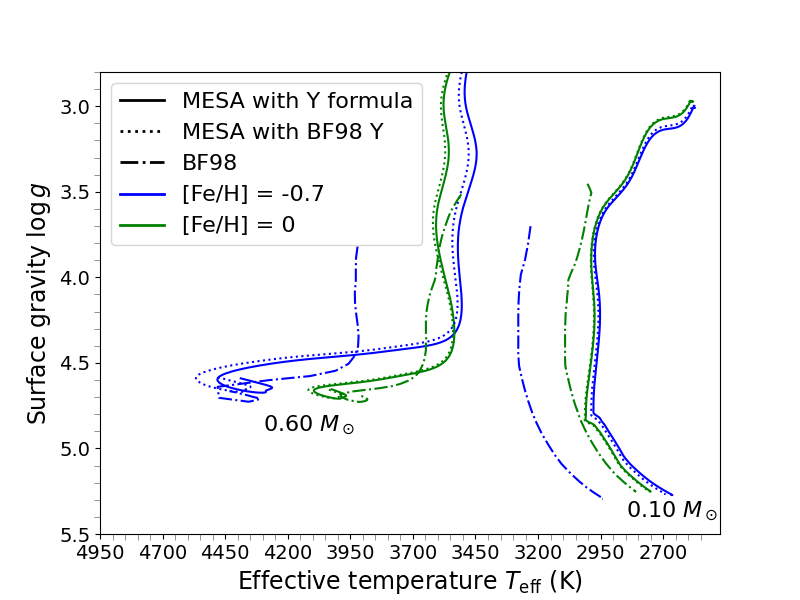

In [19]:
plt.figure(figsize=(8, 6))

plt.annotate(r'0.10 $M_\odot$', (2850, 5.4), fontsize=16)

plt.plot(Yformula_mass010_z0028_alpha1.Teff, Yformula_mass010_z0028_alpha1.log_g, color='blue', linestyle='-')
plt.plot(Yformula_mass010_z0142_alpha1.Teff, Yformula_mass010_z0142_alpha1.log_g, color='green', linestyle='-')

plt.plot(fixedY_mass010_z0028_alpha1.Teff, fixedY_mass010_z0028_alpha1.log_g, color='blue', linestyle=':')
plt.plot(fixedY_mass010_z0142_alpha1.Teff, fixedY_mass010_z0142_alpha1.log_g, color='green', linestyle=':')

plt.plot(mass_010_feh_m05['Teff'], mass_010_feh_m05['logg'], color='blue', ls='-.')
plt.plot(mass_010_feh_p00_alpha1['Teff'], mass_010_feh_p00_alpha1['logg'], color='green', ls='-.')

plt.annotate(r'0.60 $M_\odot$', (4300, 4.9), fontsize=16)

plt.plot(Yformula_mass060_z0028_alpha1.Teff, Yformula_mass060_z0028_alpha1.log_g, color='blue', linestyle='-')
plt.plot(Yformula_mass060_z0142_alpha1.Teff, Yformula_mass060_z0142_alpha1.log_g, color='green', linestyle='-')

plt.plot(fixedY_mass060_z0028_alpha1.Teff, fixedY_mass060_z0028_alpha1.log_g, color='blue', linestyle=':')
plt.plot(fixedY_mass060_z0142_alpha1.Teff, fixedY_mass060_z0142_alpha1.log_g, color='green', linestyle=':')

plt.plot(mass_060_feh_m05['Teff'], mass_060_feh_m05['logg'], color='blue', ls='-.')
plt.plot(mass_060_feh_p00_alpha1['Teff'], mass_060_feh_p00_alpha1['logg'], color='green', ls='-.')


# Set axis labels
plt.xlabel(r'Effective temperature $T_{\text{eff}}$ (K)', fontsize=17)
plt.ylabel(r'Surface gravity $\log g$', fontsize=17)

plt.title(r'')

# Retrieve current axis
ax = plt.gca()

# Set major and minor ticks
xmajor_ticks = np.arange(4950, 2500, -250)
xminor_ticks = np.arange(4950, 2500, -50)
ymajor_ticks = np.arange(5.5, 2, -0.5)
yminor_ticks = np.arange(5.5, 2, -0.1)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

# Customize tick appearance
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', length=4, color='gray')

# Invert axes
ax.invert_xaxis()
ax.invert_yaxis()

plt.ylim(5.5,2.8)

# Enable grid for minor ticks
#ax.grid(which='both', linestyle='--', linewidth=0.5)
#ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

# Create a custom legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, linestyle='-', label=r'MESA with Y formula'),
    Line2D([0], [0], color='black', lw=2, linestyle=':', label=r'MESA with BF98 Y'),
    Line2D([0], [0], color='black', lw=2, linestyle='-.', label=r'BF98'),
    Line2D([0], [0], color='blue', lw=2, label=r'[Fe/H] = -0.7'),
    Line2D([0], [0], color='green', lw=2, label=r'[Fe/H] = 0'),
]
plt.legend(handles=legend_elements, fontsize=16, loc='upper left')
# Save figure
plt.savefig('He-comparison-BF98.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()
